In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 20.5 MB/s eta 0:00:00


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
# Define constants for paths and parameters
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Construction PPE Detection'
DATA_YAML_PATH = os.path.join(BASE_PATH, 'data.yaml')
TRAIN_IMG_PATH = os.path.join(BASE_PATH, 'dataset/train/images')
VAL_IMG_PATH = os.path.join(BASE_PATH, 'dataset/valid/images')
TEST_IMG_PATH = os.path.join(BASE_PATH, 'dataset/test/images')
MODEL_PATH = 'yolov8n.pt'
BEST_MODEL_WEIGHTS = 'runs/detect/train/weights/best.pt'




In [12]:
# Verify Dataset Paths
def verify_dataset_paths():
    """
    Verify the existence of training, validation, and test image directories.
    """
    paths = {
        "Training": TRAIN_IMG_PATH,
        "Validation": VAL_IMG_PATH,
        "Test": TEST_IMG_PATH
    }

    for name, path in paths.items():
        print(f"{name} images exist: {os.path.exists(path)}")


In [13]:
# Train the Model
def train_model(epochs=20, img_size=640):
    """
    Train the YOLO model.

    Parameters:
    - epochs: Number of training epochs
    - img_size: Size of the images for training
    """
    print("Starting model training...")
    !yolo task=detect mode=train model={MODEL_PATH} data='{DATA_YAML_PATH}' epochs={epochs} imgsz={img_size}
    print("Model training complete.")

In [14]:
# Evaluate the Model
def evaluate_model():
    """
    Evaluate the trained model on the validation dataset.
    """
    print("Evaluating the model...")
    !yolo task=detect mode=val model={BEST_MODEL_WEIGHTS} data='{DATA_YAML_PATH}' imgsz=640
    print("Model evaluation complete.")


In [15]:
# Test the Model
def test_model():
    """
    Test the model on the test dataset.
    """
    print("Testing the model...")
    !yolo task=detect mode=test model={BEST_MODEL_WEIGHTS} data='{DATA_YAML_PATH}' imgsz=640
    print("Model testing complete.")


In [16]:
# Visualize Predictions
def visualize_predictions(image_path):
    """Visualize predictions for a specific image using the trained model."""
    if not os.path.exists(image_path):
        print(f"Error: Image path not found - {image_path}")
        return

    print(f"Visualizing predictions for {image_path}...")
    model = YOLO(BEST_MODEL_WEIGHTS)
    print(f"Class names: {model.names}")

    # Run prediction
    results = model.predict(source=image_path, save=True, imgsz=640)

    # Construct the path to the predicted image
    predicted_image_path = os.path.join('runs', 'detect', 'predict', os.path.basename(image_path))
    if not os.path.exists(predicted_image_path):
        print(f"Error: Predicted image not found at {predicted_image_path}")
        return

    # Display the predicted image
    predicted_image = cv2.imread(predicted_image_path)
    predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)

    plt.imshow(predicted_image)
    plt.axis('off')
    plt.show()

In [19]:
# Save the Model
def save_model(destination_name='ppe_detection_model.pt'):
    """
    Save the trained model to a specified destination.

    Parameters:
    - destination_name: Name of the saved model file
    """
    destination_dir = BASE_PATH  # Define the destination directory
    destination_path = os.path.join(destination_dir, destination_name)  # Create full path

    # Ensure the destination directory exists
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)  # Create the directory if it does not exist

    print(f"Saving the model as {destination_path}...")

    # Copy the best model weights to the destination path
    os.system(f"cp '{BEST_MODEL_WEIGHTS}' '{destination_path}'")

    print("Model saved successfully.")



Visualizing predictions for /content/drive/MyDrive/Colab Notebooks/Construction PPE Detection/dataset/test/images/image_193_jpg.rf.dc29d8ce97446bde154c45fb9fc5dd47.jpg...
Class names: {0: 'boots', 1: 'gloves', 2: 'helmet', 3: 'human', 4: 'vest'}

image 1/1 /content/drive/MyDrive/Colab Notebooks/Construction PPE Detection/dataset/test/images/image_193_jpg.rf.dc29d8ce97446bde154c45fb9fc5dd47.jpg: 640x640 2 bootss, 1 helmet, 1 vest, 7.9ms
Speed: 2.0ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


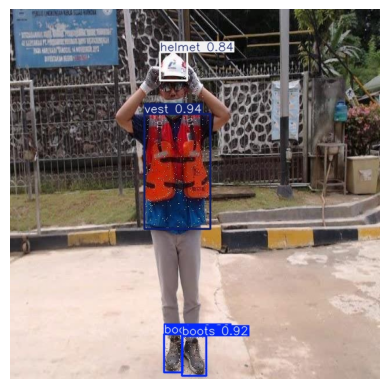

Saving the model as /content/drive/MyDrive/Colab Notebooks/Construction PPE Detection/ppe_detection_model.pt...
Model saved successfully.


In [20]:
# Main Execution Flow
if __name__ == "__main__":
    # Verify dataset paths
    verify_dataset_paths()

    # Train the model
    train_model(epochs=20, img_size=640)

    # Evaluate the model
    evaluate_model()

    # Test the model
    test_model()

    # Visualize predictions (use a specific test image)
    visualize_predictions(os.path.join(TEST_IMG_PATH, 'image_193_jpg.rf.dc29d8ce97446bde154c45fb9fc5dd47.jpg'))

    # Save the trained model
    save_model(destination_name='ppe_detection_model.pt')

In [22]:
import shutil
from google.colab import files
# Compress the folder
shutil.make_archive('model_results', 'zip', '/content/runs/detect')

files.download('model_results.zip')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>